In [ ]:
import csv,re
from textblob import TextBlob
import tweepy
import re
import pandas as pd
import matplotlib.pyplot as plt


consumer_key= "ennASdV55gqrbmVLxTon3furf"
consumer_secret= "v8GqFgbj9TLffgCLjE5r4fIiV2sIcKb68U7li8e1uVJb4R55Vu"
access_token= "1562124630651191296-lZBqOeK0R4DwIvmAIqKj10V7yFApJY"
access_token_secret= "sazY33olqA98GkHodxb8ucb74yd9BBw7wcrhvTZo58UeV"
auth= tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token= (access_token, access_token_secret)
api= tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
def func():
    tweets = list(tweepy.Cursor(
        api.search, "{0}".format("COVID-19"), lang="en",tweet_mode='extended', count=13000).items(13000))
    Tweet_outpt = []
    for i in tweets:
        text = i.full_text
        place = ""
        if i.place:
            place = i.place.full_name
        json_output = {
            "tweet": text,
        }
        Tweet_outpt.append(json_output)
    return Tweet_outpt
final_arr=func()
df = pd.DataFrame(final_arr)
df

,tweet
0,RT @LvivTyler: Putin should have been awarded ...
1,RT @thebradfordfile: The FL Surgeon General re...
2,RT @thebradfordfile: The FL Surgeon General re...
3,RT @ikwilson: BREAKING: From Florida Departme...
4,RT @thebradfordfile: The FL Surgeon General re...
...,...
12995,"RT @yaneerbaryam: ""Researchers believe that CO..."
12996,RT @Covid19Critical: As many as 50-80% of indi...
12997,RT @elisaperego78: Italy's cardiologist and sp...
12998,RT @MoriartyLab: The Canadian Thanksgiving COV...


In [ ]:

def cleanTwt(twt):
  twt = re.sub('COVID-19','COVID-19',twt)
  twt = re.sub('COVID19','COVID19',twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt)
  twt = re.sub('@[^\s]+','',twt)
  twt = re.sub('RT','',twt)
  twt = re.sub('!','',twt)
  
  twt = ''.join([i if ord(i) < 128 else '' for i in twt])
  return twt




In [ ]:
#cleaned tweets
df['cleaned tweets'] = df['tweet'].apply(cleanTwt)

df.head(100)

,tweet,cleaned tweets
0,RT @LvivTyler: Putin should have been awarded ...,Putin should have been awarded the Nobel Pri...
1,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...
2,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...
3,RT @ikwilson: BREAKING: From Florida Departme...,BREAKING: From Florida Department of Health...
4,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...
...,...,...
95,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...
96,"The UKCB’s report, Bereavement is Everybody’s ...","The UKCBs report, Bereavement is Everybodys Bu..."
97,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...
98,RT @ID_ethics: “This article argues that exten...,This article argues that extended school clo...


In [ ]:
#Text Blob (Data Labeling)

def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#creating two columns subjectivity and polarity

df['Subjectivity'] = df['cleaned tweets'].apply(getSubjectivity)
df['Polarity'] = df['cleaned tweets'].apply(getPolarity)

df.head(100)

,tweet,cleaned tweets,Subjectivity,Polarity
0,RT @LvivTyler: Putin should have been awarded ...,Putin should have been awarded the Nobel Pri...,0.000000,0.000
1,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075
2,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075
3,RT @ikwilson: BREAKING: From Florida Departme...,BREAKING: From Florida Department of Health...,0.500000,0.050
4,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075
...,...,...,...,...
95,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075
96,"The UKCB’s report, Bereavement is Everybody’s ...","The UKCBs report, Bereavement is Everybodys Bu...",0.366667,-0.025
97,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075
98,RT @ID_ethics: “This article argues that exten...,This article argues that extended school clo...,0.250000,0.000


In [ ]:
#creating a function for sentiment text

def getSentiment(score):
  if score < 0:
    return 'Negative'

  elif score == 0:
    return 'Netural'

  elif score > 0:
    return 'Positive'


In [ ]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(10000)

,tweet,cleaned tweets,Subjectivity,Polarity,Sentiment
0,RT @LvivTyler: Putin should have been awarded ...,Putin should have been awarded the Nobel Pri...,0.000000,0.000000,Netural
1,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075000,Positive
2,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075000,Positive
3,RT @ikwilson: BREAKING: From Florida Departme...,BREAKING: From Florida Department of Health...,0.500000,0.050000,Positive
4,RT @thebradfordfile: The FL Surgeon General re...,The FL Surgeon General releasing a warning a...,0.350000,0.075000,Positive
...,...,...,...,...,...
9995,@jwgain01 @BigWesHJ Do you really want know th...,Do you really want know the truth? People ar...,0.200000,0.200000,Positive
9996,"@truemagic68 Like most issues we faced today,\...","Like most issues we faced today,those on the ...",0.483333,0.241667,Positive
9997,"RT @LegendsllLiveOn: 2 years ago today, @NtheB...","2 years ago today, released COVID-19 as the...",0.303571,-0.067857,Negative
9998,Why so injustice with us\nAlready faced delay ...,Why so injustice with usAlready faced delay of...,0.375000,-0.125000,Negative


In [ ]:
#creating a scatter plot showing subjectivity and polarity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):

  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentimental Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
  

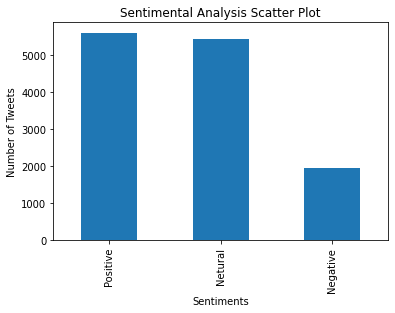

In [ ]:
df['Sentiment'].value_counts().plot(kind= 'bar')
plt.title('Sentimental Analysis Scatter Plot')
plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

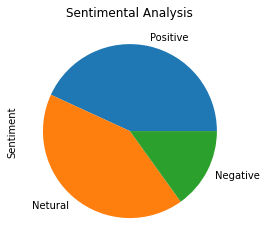

In [ ]:
df['Sentiment'].value_counts().plot(kind= 'pie')
plt.title('Sentimental Analysis')
plt.show()

In [ ]:
#Data Preprocessing 
df.head(100)




In [ ]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
